starting to run
slot 0: (0, 11)
slot 1: (4, 41)
slot 2: (4, 45)
slot 3: (4, 59)
slot 4: (-5, 30)
best slot: 1
avg rwd: 4.356277481265069


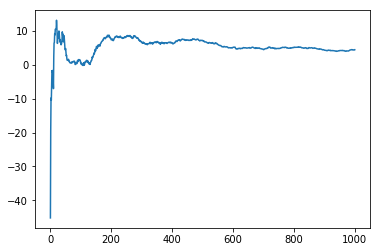

In [38]:
%matplotlib inline  

import numpy as np
import random
import matplotlib.pyplot as plt

class slot_machine:
    slots = []
    def __init__(self, k):
            for i in range(k):
                mean = random.randint(-5,5)
                std = random.randint(1,60)
                self.slots.append((mean, std))
                
    def pull_slot(self, k):
        mean, std = self.slots[k]
        return np.random.normal(mean, std)

def main():
    create_machine(5, 1000)

def create_machine(k, num_runs):
    my_slot = slot_machine(k)

    #initializing variables
    slot_data = []
    rwd_over_time = []
    rwd = 0
    total_rwd = 0
    avg_rwd = 0
    avg_rwd_per_slot = np.zeros(k)
    avg_rwd_time = []
    
    best_slot = random.randint(0, k-1) # initially choose random slot
    exp_chance = .1 # chance to explore instead of choosing greedily


    #run experiment
    print("starting to run")
   # print("k-1 = " + str(k))
    for i in range(num_runs):
        
        do_exp = random.random()
        if(do_exp <= exp_chance):
            next_slot = random.randint(0,k-1)
            while next_slot == best_slot:
               next_slot = random.randint(0,k-1) 
                
        else: next_slot = best_slot
        
        
        next_slot = int(next_slot)
        #print(type(next_slot))
        #pull slot!
        #print("pulling slot " + str(int(next_slot)))
        rwd = my_slot.pull_slot(int(next_slot))


        #calculate avg reward in total and for each slot
        total_rwd += rwd
        rwd_over_time.append(total_rwd)
        avg_rwd += (1/(i+1))*(rwd-avg_rwd)
        avg_rwd_time.append(avg_rwd)
        avg_rwd_per_slot[next_slot] += (1/(i+1)) * (rwd-avg_rwd_per_slot[next_slot]) #update avg
        #update greedy choice
        best_slot = avg_rwd_per_slot.tolist().index(max(avg_rwd_per_slot))



    #create  chart of avg reward per slot vs actual mean and std
    x = range(1, num_runs+1)
    plt.plot(x, avg_rwd_time)
    for i in range(k):
        print("slot " + str(i) + ": " + str(slot_machine.slots[i]))
              
    print("best slot: " + str(best_slot))
    print("avg rwd: " + str(avg_rwd_time[num_runs-1]))

main()